# Seattle Airbnb Exploration

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gather">Gather</a></li>
    <li><a href="#assess">Assess</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data explored in this notebook was obtained from the [Seattle Airbnb Open Data](https://www.kaggle.com/airbnb/seattle/data) Kaggle site. 

It will be explored implementing the Cross-Industry Standard Process for Data Mining (CRISP-DM) process as part of the Write a Data Science Blog Post project requirements for Udacity's Data Scientist Nanodegree. The CRISP-DM process encompasses six elements:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

The data will be gathered and initial exploration completed to enable the first two elements to be completed. Deployment will take the form of a blog post targeted at a general audience, informing them of the action items.

<a id='gather'></a>
## Gather

In [23]:
from zipfile import ZipFile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# Download data - requires saved Kaggle API key to run: https://github.com/Kaggle/kaggle-api
!kaggle datasets download -d airbnb/seattle


  0%|          | 0.00/19.5M [00:00<?, ?B/s]
  5%|5         | 1.00M/19.5M [00:01<00:21, 918kB/s]
 10%|#         | 2.00M/19.5M [00:02<00:19, 921kB/s]
 15%|#5        | 3.00M/19.5M [00:03<00:18, 927kB/s]
 21%|##        | 4.00M/19.5M [00:04<00:17, 931kB/s]
 26%|##5       | 5.00M/19.5M [00:05<00:16, 934kB/s]
 31%|###       | 6.00M/19.5M [00:06<00:15, 936kB/s]
 36%|###5      | 7.00M/19.5M [00:07<00:13, 938kB/s]
 41%|####1     | 8.00M/19.5M [00:08<00:12, 939kB/s]
 46%|####6     | 9.00M/19.5M [00:10<00:12, 910kB/s]
 51%|#####1    | 10.0M/19.5M [00:11<00:10, 919kB/s]
 57%|#####6    | 11.0M/19.5M [00:12<00:09, 925kB/s]
 62%|######1   | 12.0M/19.5M [00:13<00:08, 930kB/s]
 67%|######6   | 13.0M/19.5M [00:14<00:07, 933kB/s]
 72%|#######1  | 14.0M/19.5M [00:15<00:06, 933kB/s]
 77%|#######7  | 15.0M/19.5M [00:16<00:05, 935kB/s]
 82%|########2 | 16.0M/19.5M [00:18<00:03, 937kB/s]
 87%|########7 | 17.0M/19.5M [00:19<00:02, 939kB/s]
 92%|#########2| 18.0M/19.5M [00:20<00:01, 910kB/s]
 98%|#########7| 19

In [24]:
# Unzip files
with ZipFile('seattle.zip', 'r') as zip_file:
    zip_file.extractall()

<a id='assess'></a>
## Assess

In [25]:
# Read in files
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

### Calendar

In [26]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


The dataset contains info on the availability lists per id by date, including if the id was available and the listing price. 

In [27]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


The dataset contains 4 columns and almost 1.4M rows of data.

#### Data Issues Identified
- **listing_id**: <span style="color:green">convert to `str`</span>
- **date**: <span style="color:green"> convert to `datetime`</span>
- **available**: <span style="color:green">convert to dummy</span>
- **price**: <span style="color:green">drop $ and convert to float/int</span>

The only feature with missing values is price but it is possible that this is only the case when the listing is unavailable. 

In [28]:
# Check if number of missing values is the same as number of 'f' availability
assert calendar.price.isna().sum() == calendar.query('available == "f"').shape[0]

It's helpful to check the range of the data for any errors, but due to the current datatypes, some will have to occur after cleaning. We can check values for `available` and `price`.

In [29]:
calendar.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [30]:
calendar.price.value_counts()

$150.00    36646
$100.00    31755
$75.00     29820
$125.00    27538
$65.00     26415
$90.00     24942
$95.00     24327
$99.00     23629
$85.00     23455
$80.00     19817
$110.00    19454
$120.00    19145
$70.00     18439
$60.00     18004
$175.00    17707
$250.00    16870
$55.00     16864
$200.00    16144
$50.00     15978
$115.00    14775
$40.00     13357
$69.00     12922
$135.00    11455
$105.00    11062
$130.00    11008
$89.00     10355
$79.00     10133
$225.00     8163
$45.00      8134
$129.00     8111
           ...  
$745.00        1
$743.00        1
$669.00        1
$722.00        1
$652.00        1
$788.00        1
$693.00        1
$527.00        1
$817.00        1
$481.00        1
$625.00        1
$583.00        1
$711.00        1
$663.00        1
$723.00        1
$10.00         1
$567.00        1
$780.00        1
$503.00        1
$501.00        1
$737.00        1
$794.00        1
$517.00        1
$603.00        1
$616.00        1
$566.00        1
$624.00        1
$12.00        

It appears that while a decimal point is included in the prices, no price actually include cents. Based on what can be viewed above, the lowest price is around \$12 while the highest price ranges close to \$800.

It's also worth doing a quick double check of duplicates (though they are not expected).

In [34]:
calendar.duplicated().sum()

0

This is the only duplicate check that is relevant - all individual columns are expected to have duplicates, but as long as each row is unique, the data is as expected. 

### Listings

In [43]:
pd.set_option('display.max_columns', 100)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [32]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [33]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [37]:
# Check if all rows have unique IDs
listings.id.nunique()

3818

Yes, all are unique.

In [36]:
# What is in "experiences_offered"?
listings.experiences_offered.unique()

array(['none'], dtype=object)

Doesn't matter because all values are none - can drop.

In [38]:
# Are there less host ids?
listings.host_id.nunique()

2751

This means that some hosts have multiple listings.

In [40]:
# Check if host id and url have same number unique
assert listings.host_id.nunique() == listings.host_url.nunique()

Can drop `host_url` because won't be using for interpretation.

In [42]:
# Check if host id and name have same number unique
print(listings.host_id.nunique())
print(listings.host_name.nunique())

2751
1466


Of course they aren't - many people share the same name!

In [45]:
# Check host locations
listings.host_location.unique()

array(['Seattle, Washington, United States',
       'Kirkland, Washington, United States',
       'Quilcene, Washington, United States', 'US', nan,
       'Lowell, Massachusetts, United States',
       'Sammamish, Washington, United States',
       'Los Angeles, California, United States',
       'Shoreline, Washington, United States',
       'Portland, Oregon, United States',
       'San Francisco, California, United States',
       'Berkeley, California, United States',
       'Greenwood Village, Colorado, United States',
       'Ciudad Obregón, Sonora, Mexico',
       'Mercer Island, Washington, United States',
       'Prescott Valley, Arizona, United States',
       'Long Beach, California, United States',
       'San Diego, California, United States', 'SG',
       'Breckenridge, Colorado, United States',
       'Massachusetts, United States', 'Addison, Texas, United States',
       'Kent, Washington, United States',
       'Newcastle, Washington, United States',
       'Tucson, Ar

In [46]:
# Check response times
print(listings.host_response_time.nunique())
listings.host_response_time.unique()

4


array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

Four levels, easy to dummy.

In [47]:
# Check values for acceptance rate
listings.host_acceptance_rate.value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

Value counts are not very interesting, perhaps just create dummy for missing.

In [48]:
# Explore missing values for superhost
listings[listings.host_is_superhost.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1297,8354452,https://www.airbnb.com/rooms/8354452,20160104002432,2016-01-04,The View | Be Inspired in Seattle,A studio with stunning waterfront view worth t...,Looking for that perfect spot to take-in all o...,A studio with stunning waterfront view worth t...,none,This spot is in Belltown across the street fro...,Please accept my apologies for not being able ...,Seattle has a lot of transportation options in...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/im/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,https://a2.muscache.com/ac/pictures/6d46a5de-9...,42515980,https://www.airbnb.com/users/show/42515980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"Western Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616705,-122.353969,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$99.00,$725.00,NaN,NaN,$25.00,1,$25.00,2,13,2 months ago,t,30,60,89,89,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
1419,10235014,https://www.airbnb.com/rooms/10235014,20160104002432,2016-01-04,Luxury Apartment in Belltown / SLU,Beautiful building near the heart of downtown ...,NaN,Beautiful building near the heart of downtown ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/im/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,https://a2.muscache.com/ac/pictures/2644576c-4...,1075031,https://www.airbnb.com/users/show/1075031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,"6th Avenue, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615974,-122.340537,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$250.00,"$1,200.00","$3,600.00",NaN,NaN,1,$0.00,1,1125,a week ago,t,3,3,3,3,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


I'm going to drop the these two values because I don't understand why this information is missing. 

In [50]:
# Explore host neighbourhood
print(listings.host_neighbourhood.nunique())
listings.host_neighbourhood.unique()

102


array(['Queen Anne', nan, 'Ballard', 'Belltown', 'Phinney Ridge', 'Alki',
       'Fremont', 'Holly', 'Lower Queen Anne', 'Green Lake', 'Eastlake',
       'Ravenna', 'Westlake', 'Columbia City', 'South Park', 'Kaanapali',
       'Wallingford', 'Capitol Hill', 'Long Beach', 'Northwest District',
       'Waianae Coast', 'Minor', 'Magnolia', 'Madrona',
       'Harrison/Denny-Blaine', 'Leschi', 'University District',
       'Roosevelt', 'Mission District', 'Madison Park', 'Stevens',
       'Central San Pedro', 'Atlantic', 'North Beacon Hill',
       'Central Business District', 'Pike Place Market', 'Portage Bay',
       'South Lake Union', 'Fenway/Kenmore', 'East Village',
       'Clairemont Mesa East', 'Forestland', 'Hollywood',
       'Manhattan Beach', 'Downtown Toronto', 'International District',
       'Yesler Terrace', 'First Hill', 'Anaheim', 'Maple Leaf',
       'Seward Park', 'Pioneer Square', 'Gatewood', 'The Junction',
       'North Admiral', 'Arbor Heights', 'North Hollywood', '

These could be helpful, but that's a lot of dummies, will need to check against number of rows and other dummies.

In [52]:
# What is the difference between host_listings_count & host_total_listings_count
(listings.host_listings_count == listings.host_total_listings_count).sum() 

3816

There's no difference except for the two missing values. Can drop one.

In [53]:
# Explore host pictures
listings.host_has_profile_pic.value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

Essentially bool

In [55]:
# Check values for city
listings.city.value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
seattle                     1
西雅图                         1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [56]:
# Check values for state
listings.state.value_counts()

WA    3817
wa       1
Name: state, dtype: int64

These both mean Washington.

In [59]:
# Check single market
assert listings.market.nunique() == 1

In [61]:
# Check values for smart_listing
listings.smart_location.value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
西雅图, WA                         1
seattle, wa                     1
Ballard, Seattle, WA            1
Phinney Ridge Seattle, WA       1
Name: smart_location, dtype: int64

These all mean Seattle. 

In [62]:
# Check details for country
assert listings.country.nunique() == 1
assert listings.country_code.nunique() == 1

In [64]:
# Check property types
listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

16 levels, but not hard to dummy. 

In [65]:
# Check room types
listings.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

Three levels, easy to dummy.

In [66]:
# Explore bathroom nulls
listings[listings.bathrooms.isna()]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1242,19611,https://www.airbnb.com/rooms/19611,20160104002432,2016-01-04,1 Bedroom Downtown Seattle Oasis,This central unit is perfect for anyone lookin...,Seattle Oasis Vacations proudly offer this wel...,This central unit is perfect for anyone lookin...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/im/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,https://a2.muscache.com/ac/pictures/4b39eff5-6...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,f,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615611,-122.345927,t,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",NaN,$107.00,NaN,NaN,NaN,$96.00,1,$0.00,2,365,today,t,22,46,76,151,2016-01-04,26,2010-03-23,2015-11-12,87.0,9.0,9.0,10.0,9.0,9.0,8.0,f,NaN,WASHINGTON,f,strict,t,t,6,0.37
1314,59827,https://www.airbnb.com/rooms/59827,20160104002432,2016-01-04,1 Bedroom Sweeping View Oasis,NaN,"Welcome to Seattle Oasis Vacations, your home ...","Welcome to Seattle Oasis Vacations, your home ...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/im/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,https://a2.muscache.com/ac/pictures/1e559a5c-7...,74305,https://www.airbnb.com/users/show/74305,Darik,2010-01-27,"Kent, Washington, United States","My wife, Sally and I are excited for you to st...",within a few hours,94%,100%,f,https://a0.muscache.com/ac/users/74305/profile...,https://a0.muscache.com/ac/users/74305/profile...,Belltown,34.0,34.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"3rd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.616274,-122.344126,t,Apartment,Entire home/apt,4,NaN,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",NaN,$135.00,NaN,NaN,NaN,$96.00,1,$0.00,2,365,today,t,24,54,84,204,2016-01-04,13,2010-12-24,2015-12-20,87.0,9.0,9.0,9.0,9.0,9.0,8.0,f,NaN,WASHINGTON,t,strict,t,t,6,0.21
1357,19623,https://www.airbnb.com/rooms/19623,20160104002432,2016-01-04,2 Bedroom Downtown Seattle Oasis,NaN,Seattle Oasis Vacations proudly offer this we

There's no real pattern to the nulls, but very few, so may just drop these entries.

In [67]:
# Explore bed_type
listings.bed_type.value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

Five levels, easy to create dummies.

In [69]:
# Explore meaning of guests_included
guests = listings[['accommodates', 'guests_included']].copy()
guests['diff'] = listings.accommodates - listings.guests_included
guests.head()

,accommodates,guests_included,diff
0,4,2,2
1,4,1,3
2,11,10,1
3,3,1,2
4,6,6,0


In [73]:
guests.describe()

,accommodates,guests_included,diff
count,3818.000000,3818.000000,3818.000000
mean,3.349398,1.672603,1.676794
std,1.977599,1.311040,1.693208
min,1.000000,0.000000,-13.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,1.000000,1.000000
75%,4.000000,2.000000,2.000000
max,16.000000,15.000000,13.000000


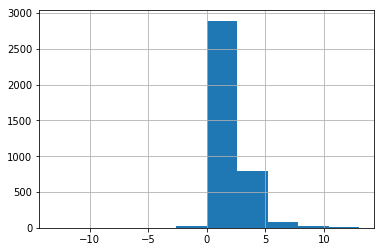

In [72]:
guests['diff'].hist();

There's at least one strange outlier. It seems the majority interpret "guests" to mean "additional person beyond yourself. But some seem to interpret as "total number of people staying." I think this means additional guests will typically incur a cost. I might create a "max occupancy covered by price" but it will require some assumptions.

In [77]:
# Explore min/max nights
listings[['minimum_nights', 'maximum_nights']].describe()

,minimum_nights,maximum_nights
count,3818.000000,3818.000000
mean,2.369303,780.447617
std,16.305902,1683.589007
min,1.000000,1.000000
25%,1.000000,60.000000
50%,2.000000,1125.000000
75%,2.000000,1125.000000
max,1000.000000,100000.000000


The majority have 1 or 2 minimum nights (no listings have 0). At least one listing has a maximum of 1. Most places seem to not really have a max, as they are listing values that are equivalent of 3 years+. 

In [78]:
# Explore calendar updated
listings.calendar_updated.unique()

array(['4 weeks ago', 'today', '5 weeks ago', '6 months ago',
       '7 weeks ago', '2 weeks ago', 'yesterday', '5 months ago',
       'a week ago', '5 days ago', '3 days ago', '2 months ago',
       '3 months ago', '4 days ago', '2 days ago', '3 weeks ago',
       '1 week ago', '13 months ago', '6 weeks ago', '8 months ago',
       '12 months ago', '4 months ago', 'never', '6 days ago',
       '10 months ago', '14 months ago', '9 months ago', '7 months ago',
       '30 months ago', '11 months ago', '22 months ago', '16 months ago',
       '15 months ago', '17 months ago'], dtype=object)

These could be converted to numerical values (equivalent days) if used to not require dummy variables. 

In [81]:
# Check if variation in has_availability
assert listings.has_availability.nunique() == 1

All listings have availability, can drop this column.

In [83]:
# Check if scrape date and calendar scrape date are the same
assert (listings.last_scraped == listings.calendar_last_scraped).sum() == listings.shape[0]

These are the same, can be dropped.

In [86]:
# Check if anyone requires license
listings.requires_license.value_counts()

f    3818
Name: requires_license, dtype: int64

No, can be dropped.

In [87]:
# Check if variation in jurisdiction
assert listings.jurisdiction_names.nunique() == 1

No, can be dropped

In [88]:
# Explore cancellation policies
print(listings.cancellation_policy.nunique())
listings.cancellation_policy.unique()

3


array(['moderate', 'strict', 'flexible'], dtype=object)

Three levels, easy to dummy.

In [90]:
# Check calculated_host_listings_count is the same as host_listings_count
(listings.calculated_host_listings_count == listings.host_listings_count).sum()

3189

For the most part (83.5% of the time), they do match. What is this second colum?

In [91]:
listings[['calculated_host_listings_count', 'host_listings_count']].head(10)

,calculated_host_listings_count,host_listings_count
0,2,3.0
1,6,6.0
2,2,2.0
3,1,1.0
4,1,2.0
5,1,1.0
6,1,1.0
7,5,5.0
8,1,1.0
9,6,6.0


It suggests that one of these is not accurate. Will need to do more work if going to determine which is accurate.

The dataset contains 92 columns and 3,818 rows of data. It looks as if this provides details for unique listings per row.

Details of the columns are as follows (data management plans are in green):
- **id**: Listing id, all unique, helpful for joining. <span style="color:green">Convert to str.</span>
- **listing_url**: The url for the listing of the form `https://www.airbnb.com/rooms/id`. <span style="color:green">Once it is confirmed that nunique for this matches id, this can be dropped.</span>
- **scrape_id**: The id of the data scrape by airbnb. <span style="color:green">Can be dropped.</span>
- **last_scraped**: The date of the scrape. <span style="color:green">Can be dropped.</span>
- **name**: Name selected by host for listing. <span style="color:green">Could be useful for common term extraction.</span>
- **summary, space, description**: Text descriptions of the property provided by host. It appears that the information found in each of these can overlap. <span style="color:green">Could be useful for common term extraction.</span>
- **experiences_offered**: All values are `none`. <span style="color:green">Can be dropped.</span>
- **neighborhood_overview**: Neighborhood description that looks to be provided by the host. Not always provided. 27% missing. <span style="color:green">Could be useful for common term extraction.</span>
- **notes**: Additional information provided by the host. The information provided in this column can be quite variable. 42% missing. <span style="color:green">Maybe just create missing dummy.</span>
- **transit**: Description of availability of public transport by host. 24% missing. <span style="color:green">Text extraction likely quite helpful.</span>
- **thumbnail_url**: Link of the thumbnail image used for the listing. 8% missing. <span style="color:green">Can create dummy for image present or not.</span>
- **medium_url**: Larger size of above. Same missing %. <span style="color:green">Can be dropped.</span>
- **picture_url**: Always has a picture url. What is the picture if thumbnail is missing? Otherwise, the same. <span style="color:green">Likely can be dropped.</span>
- **xl_picture_url**: Larger size of above. Same missing %. <span style="color:green">Can be dropped.</span>
- **host_id**: ID for the host, there are definitely hosts with multiple listings. <span style="color:green">Convert to str</span>
- **host_url**: url for host, same number as host_id. <span style="color:green">Can be dropped.</span>
- **host_name**: Seems just first name is typically used. Repeats because ppl have the same name. <span style="color:green">Can be dropped.</span>
- **host_since**: Date from when the host joined. <span style="color:green">Convert to date</span>
- **host_location**: Info provided by hosts. Typically of city, state, country format, but not consistent. 8 missing. <span style="color:green">Needs cleaning to be interpretable.</span>
- **host_about**: Description provided by host. My contain location and employment/hobbies info. 22% missing. <span style="color:green">Could be useful for common term extraction.</span>
- **host_response_time**: Ordinal categorization of response time with four levels. 14% missing. <span style="color:green">Creat dummies.</span>
- **host_response_rate**: Percentage of whether they respond. 14% missing. <span style="color:green">Drop % and convert to int.</span>
- **host_acceptance_rate**: Almost all 100% (One 0%). 20% missing - does this mean no one has applied? <span style="color:green">Can dummy for missing.</span>
- **host_is_superhost**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **host_thumbnail_url**: Url of host pic thumbnail. <span style="color:green">Can be dropped.</span>
- **host_picture_url**: Large version of above. <span style="color:green">Can be dropped.</span>
- **host_neighbourhood**: Seems to represent host location but distinct values. Can be in Seattle but can be elsewhere. 102 values. 8% missing. <span style="color:green">Need to be combined with state/country for accurate location info.</span>
- **host_listings_count**: Seems to be number of listings per host. Only two missing. <span style="color:green">Double check data accuracy.</span>
- **host_total_listings_count**: Seems no different than above. <span style="color:green">Can be dropped.</span>
- **host_verifications**: List of methods(?) that host has been verified. <span style="color:green">Need to extract values if using.</span>
- **host_has_profile_pic**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **host_identity_verified**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **street**: Provides street, city, state abbr, zip code and country info for listing. <span style="color:green">Likely drop. Maybe extract missing zipcodes.</span>
- **neighbourhood**: <span style="color:green">Can be dropped because of below.</span>
- **neighbourhood_cleansed**: Provides neighbourhood details for the listing. <span style="color:green">Maybe convert to dummy.</span>
- **neighbourhood_group_cleansed**: Provides wider grouping of listing location. <span style="color:green">Maybe convert to dummy.</span>
- **city**: All values are the equivalent of Seattle <span style="color:green">Can be dropped.</span>
- **state**: All values are the equivalent of Washington <span style="color:green">Can be dropped.</span>
- **zipcode**: Zipcode of listing. <span style="color:green">Attempt to use `street` to extract missing values.</span>
- **market**: <span style="color:green">Can be dropped.</span>
- **smart_location**: All equivalent of Seattle. <span style="color:green">Can be dropped.</span>
- **country_code**: <span style="color:green">Can be dropped.</span>
- **country**: <span style="color:green">Can be dropped.</span>
- **latitude, longitude**: Coordinates for listing
- **is_location_exact**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **property_type**: Selection of property types. <span style="color:green">Convert to dummies.</span>
- **room_type**: Three levels, entire, private, shared. <span style="color:green">Convert to dummies.</span>
- **accommodates**: Max number of ppl able to be accommodated.
- **bathrooms**: Number of bathrooms in listing. >1% missing <span style="color:green">May drop missing.</span>
- **bedrooms**: Number of bedrooms in listing. >1% missing <span style="color:green">May drop missing.</span>
- **beds**: Number of beds in listing. 1 missing <span style="color:green">May drop missing.</span>
- **bed_type**: Five levels of bed type. <span style="color:green">Convert to dummies.</span>
- **amenities**: List of available amenities. <span style="color:green">Need to extract values and manage entries that are null.</span>
- **square_feet**: Size of listing. 97% Missing. <span style="color:green">Maybe dummy for missing.</span>
- **price**: Price of listing (at time of scrape?) <span style="color:green">Maybe drop because of calendar price.</span>
- **weekly_price**: Price per week (if available) <span style="color:green">Convert to numerical if using.</span>
- **monthly_price**: Price per month (if available) <span style="color:green">Convert to numerical if using.</span>
- **security_price**: Value of security deposit, if required. <span style="color:green">Create dummy for missing; convert to numerical.</span>
- **cleaning_fee**: Value of cleaning fee, if required. <span style="color:green">Create dummy for missing; convert to numerical.</span>
- **guests_included**: <span style="color:green">Create "max accommodation included in price" column.</span>
- **extra_people**: Cost per extra person. <span style="color:green">Convert to numerical.</span>
- **minimum/maximum_nights**: <span style="color:green">May need to manage values over a year/maximum days available.</span>
- **calendar_update**: String of last time updated (I'm assuming compared to scrape day). <span style="color:green">Convert to days equivalent if using.</span>
- **has_availability**: All have availabilities. <span style="color:green">Can be dropped.</span>
- **availability_30/60/90/365**: Number of days listed as available in the interval (assuming from scrape date). <span style="color:green">Need to compare counts to listings.</span>
- **calendar_last_scraped**: <span style="color:green">Can be dropped.</span>
- **number_of_reviews**: Number of reviews received by host.
- **first/last_review**: Date of first/last review, not sure why some missing. <span style="color:green">Convert to date.</span>
- **review_scores_rating**: Some central measure of all ratings from 0 to 100. <span style="color:green">May dummy missing.</span>
- **review_scores_accuracy/cleanliness/checkin/location/value**: Some central measure of the rating from 1 (low) to 10 (high) on the characteristic described. <span style="color:green">May dummy missing.</span>
- **requires_license**: <span style="color:green">Can be dropped.</span>
- **license**: All null. <span style="color:green">Can be dropped.</span>
- **jurisdiction_names**: <span style="color:green">Can be dropped.</span>
- **instant_bookable**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **cancellation_policy**: Three levels. <span style="color:green">Convert to dummies.</span>
- **require_guest_profile_picture/phone_verification**: Binary with 't' and 'f'. <span style="color:green">Convert to 1, 0.</span>
- **calculated_host_listings_count**: <span style="color:green">Needs further investigation to use.</span>
- **reviews_per_month**: As described. Same amount missing as first/last review. <span style="color:green">May dummy missing.</span>

### Reviews

In [92]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


This dataset contains information about reviews given by guests.

In [93]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


The dataset contains six columns and almost 85K rows of data.

#### Data Issues Identified
- **listing_id, id, reviewer_id**: <span style="color:green">convert to `str`</span>
- **date**: <span style="color:green"> convert to `datetime`</span>

The only feature with missing values is `comments`. It appears a small amount of people give some kind of review without leaving comments.

I'm not sure if I'm going to use this data. I could do some sentiment analysis, or work out how often people are repeat users of airbnb (based on those who comment), or at the same place. 